# Построение области допустимых значений параметров

In [1]:
# импорт необходимых модулей
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
import scipy.optimize
np.set_printoptions(precision=3)
%matplotlib inline

### Задача

Дана деталь квадратной формы со стороной H (100 см), имеющая круглый вырез радиуса R см.

Центр выреза находится на серединной линии детали на расстоянии L см от ее края.

Требуется построить область допустимых значений параметорв L и R при условии, минимальный размер любого элемента (например, минимальная толщина стенки, минимальный радиус отверстия и т.д.) равен 1 см.


![](moo_example_task.png)

### Решение

In [2]:
H = 100

In [3]:
def splitBorder(nodes, splits, closed=False):
    N = nodes.shape[0]-1
    if type(splits) == int:
        splits = [splits]*N
    if len(splits) < N:
        return None
    n = sum(splits[:N])
    if not closed:
        n += 1
    res = np.empty((n, 2))
    if not closed:
        res[-1]=nodes[-1]
    s = 0
    for i in range(N):
        res[s:s+splits[i], 0] = \
        np.linspace(nodes[i,0], nodes[i+1,0], splits[i]+1)[:-1]
        res[s:s+splits[i], 1] = \
        np.linspace(nodes[i,1], nodes[i+1,1], splits[i]+1)[:-1]
        s += splits[i]
    return res

In [4]:
def closeBorder(nodes):
    return np.vstack((nodes, nodes[0]))

In [5]:
pts = np.array([[2., 1.],
                [H-2.,1.],
                [H/2.,H/2.-1.]])
splits = 50

In [6]:
LRbrd = splitBorder(closeBorder(pts), splits, closed=True)

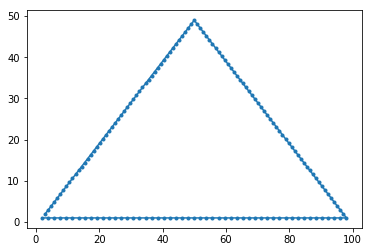

In [7]:
plt.plot(LRbrd[:,0], LRbrd[:,1], '.-')

In [8]:
# R <= L-1, L <= H/2
# R <= H-L-1, L >= H/2

# R <= -|L-H/2|+H/2-1

# R >= 1

In [9]:
# 1     <=  1*L -1*R <= np.inf
# 1 - H <= -1*L -1*R <= np.inf
# 1     <=  0*L +1*R <= np.inf 

In [10]:
# [1., 1-H, 1]
# [np.inf, np.inf, np.inf]
# [[1., -1], [-1, -1], [0, 1]]

In [18]:
# функция, определяющая принадлежность точки L,R области допустимых значений
def inBorder(L, R):
    #L, R = LR[:,0], LR[:,1]
    mask1 = R >= 1.
    #LHL = np.vstack((L, H-L)).T
    #mask2 = R <= np.min(LHL, axis=1)-1
    mask2 = R <= -np.abs(L-H/2.)+H/2.-1
    return mask1 & mask2

In [12]:
import numpy.random as npr

In [14]:
x = npr.rand(1000)*(H-2-2)+2
y = npr.rand(1000)*(H/2.-1-1)+1
np.any(x>H-2) and np.any(x<2), np.any(y>H/2.-1) and np.any(y<1)

(False, False)

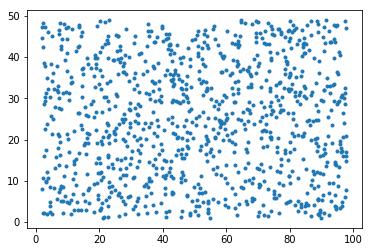

In [15]:
plt.plot(x, y, '.');

In [16]:
mask = inBorder(x, y)
mask.shape

(1000,)

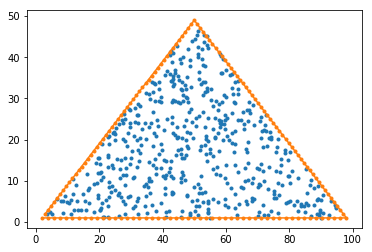

In [17]:
plt.plot(x[mask], y[mask], '.')
plt.plot(LRbrd[:,0], LRbrd[:,1], '.-');